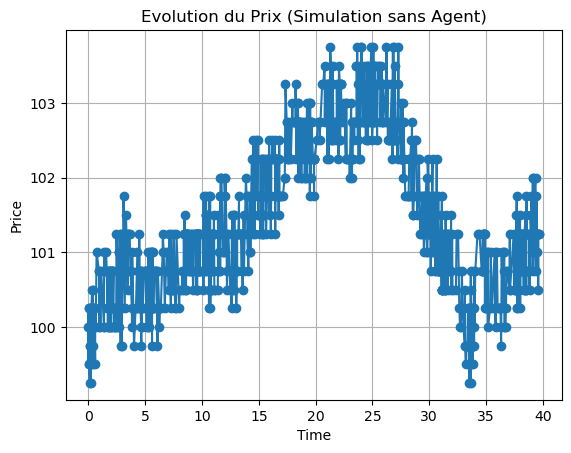

Episode 1/15000 - Total Reward: 0.00 - Epsilon: 0.99
Episode 2/15000 - Total Reward: 101.00 - Epsilon: 0.99
Episode 3/15000 - Total Reward: 100.25 - Epsilon: 0.99
Episode 4/15000 - Total Reward: 101.50 - Epsilon: 0.98
Episode 5/15000 - Total Reward: 100.50 - Epsilon: 0.98
Episode 6/15000 - Total Reward: 100.75 - Epsilon: 0.97
Episode 7/15000 - Total Reward: 100.50 - Epsilon: 0.97
Episode 8/15000 - Total Reward: 101.50 - Epsilon: 0.96
Episode 9/15000 - Total Reward: 0.00 - Epsilon: 0.96
Episode 10/15000 - Total Reward: 101.75 - Epsilon: 0.95
Episode 11/15000 - Total Reward: 102.00 - Epsilon: 0.95
Episode 12/15000 - Total Reward: 103.00 - Epsilon: 0.94
Episode 13/15000 - Total Reward: 104.50 - Epsilon: 0.94
Episode 14/15000 - Total Reward: 105.50 - Epsilon: 0.93
Episode 15/15000 - Total Reward: 0.00 - Epsilon: 0.93
Episode 16/15000 - Total Reward: 106.50 - Epsilon: 0.92
Episode 17/15000 - Total Reward: 107.00 - Epsilon: 0.92
Episode 18/15000 - Total Reward: 106.25 - Epsilon: 0.91
Episode

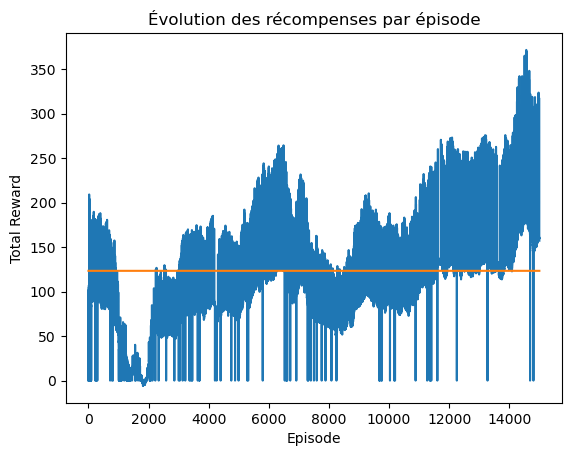

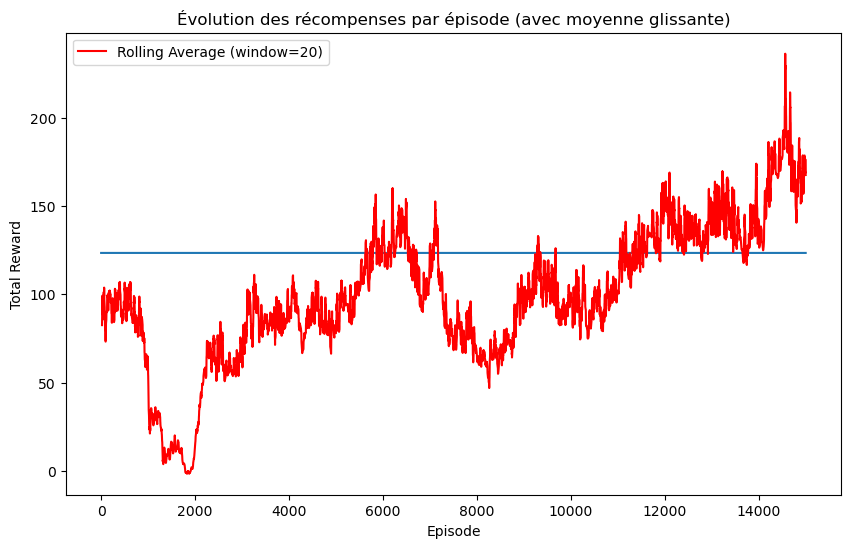

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
from collections import deque
import qr_ as qr
import matplotlib.pyplot as plt

def simulate_price_evolution():
    def order_bid(x):
        return 0.18*(x**2+1)
    def order_ask(x):
        return 0.18*(x**2+1)
    def tabs_order():
        return [order_ask, order_bid]
    def cancel_bid_1(x):
        return 0.3*(x**2+1)
    def cancel_ask_1(x):
        return 0.3*(x**2+1)
    def cancel_bid_2(x):
        return 0.7*(x**4+1)
    def cancel_ask_2(x):
        return 0.7*(x**4+1)
    def cancel_bid_3(x):
        return 1*(x**4+1)
    def cancel_ask_3(x):
        return 1*(x**4+1)
    def tabs_cancel():
        return [cancel_ask_1, cancel_ask_2, cancel_ask_3, cancel_bid_1, cancel_bid_2, cancel_bid_3]
    def add_bid_1(x):
        return 0.2*(x**4+1)
    def add_ask_1(x):
        return 0.2*(x**4+1)
    def add_bid_2(x):
        return 0.2*(x**2+1)
    def add_ask_2(x):
        return 0.3*(x**2+1)
    def add_bid_3(x):
        return 0.7*(x**2+1)
    def add_ask_3(x):
        return 0.7*(x**2+1)
    def tabs_add():
        return [add_ask_1, add_ask_2, add_ask_3, add_bid_1, add_bid_2, add_bid_3]
    
    tab_add = tabs_add()
    tab_cancel = tabs_cancel()
    tab_order = tabs_order()
    intensity_cancel = tab_cancel
    intensity_order  = tab_order
    intensity_add    = tab_add
    
    price_0 = 100.0
    tick = 0.5
    theta = 0.5
    nb_of_action = 1000
    liquidy_last_lim = 50
    size_max = [5, 4, 8]  # [size_max_add, size_max_cancel, size_max_order]
    lambda_event = [10 for i in range(34)] + [100 for i in range(15)] + [1000]
    event_prob = 1/200
    
    initial_ask = [10, 20, 30]
    initial_bid = [10, 20, 30]
    
    
    simulation = qr.Qr(intensity_cancel, intensity_order, intensity_add,
                    price_0, tick, theta, nb_of_action, liquidy_last_lim,
                    size_max, lambda_event, event_prob)
    
    df = simulation.run_market(initial_ask, initial_bid)
    
    plt.figure()
    plt.plot(df['Time'], df['Price'], marker='o')
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title("Evolution du Prix (Simulation sans Agent)")
    plt.grid(True)
    plt.show()
    
    return df

df_simulation = simulate_price_evolution()


qr.main()


In [4]:
import QR as queue_r
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 100)

In [5]:
def order_bid(x):
    return 0.18*(x**2+1)

def order_ask(x):
    return 0.18*(x**2+1)

def tabs_order():
    return [order_ask, order_bid]

def cancel_bid_1(x):
    return 0.3*(x**2+1)

def cancel_ask_1(x):
    return 0.3*(x**2+1)

def cancel_bid_2(x):
    return 0.7*(x**4+1)

def cancel_ask_2(x):
    return 0.7*(x**4+1)

def cancel_bid_3(x):
    return 1*(x**4+1)

def cancel_ask_3(x):
    return 1*(x**4+1)

def tabs_cancel():
    return [cancel_ask_1,cancel_ask_2, cancel_ask_3, cancel_bid_1, cancel_bid_2, cancel_bid_3]

def add_bid_1(x):
    return 0.2*(x**4+1)

def add_ask_1(x):
    return 0.2*(x**4+1)

def add_bid_2(x):
    return 0.2*(x**2+1)

def add_ask_2(x):
    return 0.3*(x**2+1)

def add_bid_3(x):
    return 0.7*(x**2+1)

def add_ask_3(x):
    return 0.7*(x**2+1)

def tabs_add():
    return [add_ask_1,add_ask_2, add_ask_3, add_bid_1, add_bid_2, add_bid_3]





In [6]:
tab_add = tabs_add()
tab_cancel = tabs_cancel()
tab_order = tabs_order()
price_0 = 100
tick = 1
theta = 0.3
nb_of_action = 210000
initial_ask = [10, 20, 30]
initial_bid = [10, 20, 30]
liquidy_last_lim = 50
size_max = [5,4,8]
lambda_event = [10 for i in range (34)] + [100 for i in range (15)] + [1000]
event_prob = 1/200

In [7]:
Market = queue_r.Qr( tab_cancel, tab_order, tab_add, price_0, tick, theta, nb_of_action, liquidy_last_lim, size_max, lambda_event, event_prob)
# df = Market.run_market(initial_ask, initial_bid)
# df.head(10)

In [8]:
Market.visu(initial_ask, initial_bid, False)

KeyboardInterrupt: 

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Créer une boîte de texte et une zone de message
reponse = widgets.Text(placeholder="Écris une phrase de 10 mots...")
message = widgets.Output()

# Fonction de vérification
def on_submit(change):
    with message:
        message.clear_output()  # Efface le message précédent
        mots = reponse.value.split()  # Sépare la phrase en mots
        if len(mots) == 4:
            print("✅ Ta phrase :", reponse.value)

# Associer la fonction à l'événement (mise à jour en temps réel)
reponse.observe(on_submit, names='value')

# Afficher les widgets
display(reponse, message)
